### Import libraries

In [1]:
import sys
sys.path.append("..")
import os
from model import grapher_bots, exp2d_model_bots
from data import batch_creator, loader
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
kernel = "botswana"
d = True

In [4]:
botswana = np.load("/Users/omernivron/Downloads/GFDL_botswana.npy")

In [5]:
bots_dim = np.load("/Users/omernivron/Downloads/bots_data/GFDL_botswana_dimensions.npy")

In [6]:
bots_t = np.load("/Users/omernivron/Downloads/bots_data/GFDL_botswana_times.npy")

In [7]:
bots_loc =  np.load("/Users/omernivron/Downloads/GFDL_botswana_lat_lon.npy")

In [8]:
bots_win = np.load("/Users/omernivron/Downloads/GFDL_within_bots_lat_lon.npy")

In [9]:
import seaborn as sns

In [10]:
bots = np.array([ [ 25.259780721000112, -17.794106546999984 ], [ 25.219369751000045, -17.879786071999959 ], [ 25.219369751000045, -17.908001403999933 ], [ 25.226087687000074, -17.931875914999921 ], [ 25.255026489000016, -18.001122334999934 ], [ 25.296367635000138, -18.068611755999967 ], [ 25.323446086000104, -18.096620381999884 ], [ 25.357449178000138, -18.115844013999904 ], [ 25.387524861000117, -18.138995055999899 ], [ 25.408815552000107, -18.17599538199994 ], [ 25.440854939000104, -18.253199971999919 ], [ 25.473204386000106, -18.303429462999873 ], [ 25.481162557000061, -18.323376565999894 ], [ 25.490515991000109, -18.365544534999856 ], [ 25.495580281000088, -18.378877054999876 ], [ 25.508499390000082, -18.399134215999879 ], [ 25.574438518000107, -18.465693460999958 ], [ 25.608441610000057, -18.487707620999942 ], [ 25.622084188000144, -18.501143492999901 ], [ 25.669523153000057, -18.566049091999929 ], [ 25.698255249000056, -18.590233662999907 ], [ 25.736909220000143, -18.60873382599992 ], [ 25.761920613000143, -18.630334574999893 ], [ 25.773392782000059, -18.665577900999963 ], [ 25.779490601000106, -18.738751728999944 ], [ 25.815250691000131, -18.813992614999904 ], [ 25.940721069000119, -18.921272887999947 ], [ 25.967448582000088, -18.999925225999988 ], [ 25.967799520000085, -19.000957946999904 ], [ 25.964388875000054, -19.021628519999908 ], [ 25.948059123000121, -19.058732197999902 ], [ 25.944855184000062, -19.079196064999863 ], [ 25.948575887000061, -19.103277282999898 ], [ 25.956534058000045, -19.122087503999907 ], [ 25.981132039000101, -19.161775003999892 ], [ 26.011414429000126, -19.199808857999926 ], [ 26.034358765000064, -19.24373382499995 ], [ 26.130270223000139, -19.501082458999889 ], [ 26.155488322000082, -19.537152608999889 ], [ 26.19445235200007, -19.560200296999952 ], [ 26.239100789000105, -19.571465758999906 ], [ 26.292637573000064, -19.572499287999889 ], [ 26.303489624000093, -19.577253519999886 ], [ 26.313204793000125, -19.584178161999958 ], [ 26.321059611000067, -19.592032978999896 ], [ 26.33098148600007, -19.604952086999916 ], [ 26.333461955000132, -19.6130136109999 ], [ 26.326330607000102, -19.633890889999876 ], [ 26.319095906000143, -19.646293232999938 ], [ 26.312481323000043, -19.64960052499994 ], [ 26.312171264000142, -19.651357522999916 ], [ 26.324366903000083, -19.659108988999918 ], [ 26.33232507300005, -19.662416279999917 ], [ 26.362710815000099, -19.667583922999924 ], [ 26.385241740000112, -19.679056090999936 ], [ 26.412836955000103, -19.719570413999946 ], [ 26.43185388200007, -19.736520283999951 ], [ 26.450250692000083, -19.74334157299991 ], [ 26.489731486000096, -19.751919860999934 ], [ 26.508851766000106, -19.759257913999932 ], [ 26.549262736000088, -19.784062600999974 ], [ 26.566315958000104, -19.800805764999922 ], [ 26.574790893000113, -19.819512633999906 ], [ 26.581922241000143, -19.842146911999862 ], [ 26.59556481900006, -19.855582783999907 ], [ 26.614064982000087, -19.863437600999944 ], [ 26.659436889000119, -19.875736591999981 ], [ 26.673802937000119, -19.88338470499987 ], [ 26.67716996900009, -19.886815264999939 ], [ 26.684758341000077, -19.894546813999895 ], [ 26.698607625000136, -19.912530211999879 ], [ 26.713903850000094, -19.927413024999922 ], [ 26.730957072000137, -19.935887958999928 ], [ 26.750800822000116, -19.93960866299993 ], [ 26.774468628000079, -19.939815368999902 ], [ 26.811882365000116, -19.946429951999988 ], [ 26.925053752000082, -20.000896910999899 ], [ 26.961072225000066, -20.007201435999903 ], [ 26.994300171000106, -20.006788024999892 ], [ 27.026649617000089, -20.010095316999895 ], [ 27.060135946000088, -20.027561949999935 ], [ 27.069230997000147, -20.03738047199991 ], [ 27.086490926000039, -20.060531514999894 ], [ 27.097342977000096, -20.068903096999875 ], [ 27.109641968000119, -20.073243916999942 ], [ 27.119770548000076, -20.073864033999911 ], [ 27.12969242300008, -20.072933857999956 ], [ 27.141888062000106, -20.073347268999967 ], [ 27.162920370000109, -20.076551207999941 ], [ 27.183745971000064, -20.08233896899992 ], [ 27.201781047000082, -20.092984313999906 ], [ 27.214906861000117, -20.110450947999951 ], [ 27.266014852000126, -20.234164326999874 ], [ 27.28399825000011, -20.351469827999935 ], [ 27.268391967000071, -20.495750427999937 ], [ 27.306012411000097, -20.477353616999949 ], [ 27.340738973000043, -20.473012796999868 ], [ 27.453910359000076, -20.473322855999953 ], [ 27.534112183000076, -20.4830380249999 ], [ 27.590852905000077, -20.473322855999953 ], [ 27.625786174000069, -20.488619079999907 ], [ 27.665990438000108, -20.489135843999946 ], [ 27.68376713100011, -20.496060485999934 ], [ 27.698133179000138, -20.509082946999868 ], [ 27.705574585000136, -20.526652932999937 ], [ 27.702629028000047, -20.566133727999969 ], [ 27.690381713000107, -20.601480406999968 ], [ 27.682475219000082, -20.637343851999916 ], [ 27.707331583000041, -20.716718851999886 ], [ 27.709605346000046, -20.756716409999854 ], [ 27.69441247600011, -20.837745055999875 ], [ 27.689038126000071, -20.849010518999933 ], [ 27.681803426000101, -20.857588805999868 ], [ 27.676015666000126, -20.866683857999931 ], [ 27.674775431000086, -20.879913024999922 ], [ 27.675085490000072, -20.8912818399999 ], [ 27.672605021000095, -20.913709410999914 ], [ 27.672656697, -20.923527932999974 ], [ 27.680356486000107, -20.979648538999925 ], [ 27.678961222000112, -21.000732522999954 ], [ 27.666817261000119, -21.05375254299986 ], [ 27.666610555000148, -21.071219176999904 ], [ 27.674775431000086, -21.090132751999946 ], [ 27.709191935000035, -21.13447113 ], [ 27.724384807000064, -21.14966400099992 ], [ 27.793837931000041, -21.197413023999985 ], [ 27.823603556000108, -21.23172617599991 ], [ 27.849131714000066, -21.269656676999915 ], [ 27.884995158000095, -21.310171 ], [ 27.894400269000073, -21.324330342999886 ], [ 27.896674032000078, -21.332391865999867 ], [ 27.896157267000035, -21.347894794999974 ], [ 27.897810913000086, -21.355439554999933 ], [ 27.904218791000119, -21.36474131199995 ], [ 27.920548543000052, -21.381174417999915 ], [ 27.95021081500002, -21.438328551999945 ], [ 27.953001343000068, -21.448663838999948 ], [ 27.949642375000082, -21.456518655999986 ], [ 27.941942586000067, -21.468507587999852 ], [ 27.939875529000119, -21.47801605199993 ], [ 27.943337850000063, -21.479876403999938 ], [ 27.950417521000077, -21.482046813999929 ], [ 27.954448282000072, -21.487834573999905 ], [ 27.949280639000079, -21.50075368199991 ], [ 27.953208048000135, -21.510468851999946 ], [ 27.958065633000047, -21.511502379999925 ], [ 27.963698365000084, -21.510468851999946 ], [ 27.97057133000007, -21.514396259999913 ], [ 27.975738973000148, -21.52256113699994 ], [ 27.984730673000087, -21.542921650999872 ], [ 27.990415079000059, -21.551913349999907 ], [ 28.00255904100004, -21.564212341999863 ], [ 28.016563355000045, -21.572893981999911 ], [ 28.032893107000092, -21.577854918999961 ], [ 28.090770711000118, -21.581265563999892 ], [ 28.165701538000064, -21.595218199999877 ], [ 28.284867391000063, -21.596871846999932 ], [ 28.321919393000115, -21.603486429999919 ], [ 28.361761922000142, -21.61630218499991 ], [ 28.443100627000035, -21.655782979999927 ], [ 28.464598023000093, -21.660330504999962 ], [ 28.481392863000053, -21.657436624999974 ], [ 28.497309204000061, -21.651545511999885 ], [ 28.532500855000137, -21.643070576999975 ], [ 28.542939493000063, -21.638316344999893 ], [ 28.553998251000081, -21.636559346999917 ], [ 28.585934285000064, -21.64441416399994 ], [ 28.615699911000036, -21.647101337999885 ], [ 28.629704224000136, -21.651338805999927 ], [ 28.668409872000069, -21.679967549999901 ], [ 28.714195190000112, -21.693506774999975 ], [ 28.860852905000058, -21.757378844999934 ], [ 28.891031942000041, -21.76492360399989 ], [ 28.951906779000097, -21.768334248999921 ], [ 28.980845581000068, -21.774845478999893 ], [ 28.998725626000095, -21.786007588999922 ], [ 29.038723186000084, -21.797893167999945 ], [ 29.055259643000085, -21.809985453999928 ], [ 29.057636759000104, -21.829209085999949 ], [ 29.045441121000096, -21.852566833999902 ], [ 29.028904663000105, -21.876648050999847 ], [ 29.017949259000119, -21.898145446999891 ], [ 29.013815145000109, -21.940416768999881 ], [ 29.021566609000104, -21.982791442999883 ], [ 29.040531861000062, -22.020928648999941 ], [ 29.070762573000081, -22.051004332999923 ], [ 29.10796960400009, -22.069194436999865 ], [ 29.144866577000101, -22.075292256999916 ], [ 29.239331095000068, -22.072605081999896 ], [ 29.244395386000065, -22.075705667999927 ], [ 29.254110555000182, -22.087074482999924 ], [ 29.259588257000075, -22.096066182999962 ], [ 29.267339721000099, -22.115806578999923 ], [ 29.273644246000117, -22.125108336999858 ], [ 29.350073689000055, -22.186706644999987 ], [ 29.331521850000058, -22.192804463999948 ], [ 29.302893107000045, -22.190220641999943 ], [ 29.248219441000117, -22.179265238999875 ], [ 29.222071167000081, -22.182159117999944 ], [ 29.202795858000059, -22.194458108999896 ], [ 29.186621134000063, -22.207687275999888 ], [ 29.168844442000136, -22.213991800999906 ], [ 29.047818237000058, -22.220296325999911 ], [ 29.038723186000084, -22.223913675999896 ], [ 29.017845906000105, -22.250372008999889 ], [ 29.018052612000076, -22.255022887999942 ], [ 29.002756388000108, -22.263394470999927 ], [ 28.983739461000141, -22.28199798599988 ], [ 28.960226685000066, -22.310213316999949 ], [ 28.967926473000148, -22.380389912999917 ], [ 28.963378947000109, -22.392172138999911 ], [ 28.953457072000106, -22.400750426999949 ], [ 28.93040938300004, -22.440851338999934 ], [ 28.912529338000098, -22.453667093999925 ], [ 28.869379517000056, -22.448912861999929 ], [ 28.846590210000073, -22.449946390999912 ], [ 28.836771688000113, -22.463175556999914 ], [ 28.83119063400008, -22.48229583699991 ], [ 28.816824585000091, -22.492941181999896 ], [ 28.796774129000141, -22.498212177999932 ], [ 28.774759969000058, -22.501416116999906 ], [ 28.731351766000074, -22.513921813999985 ], [ 28.659004761000091, -22.551955667999934 ], [ 28.623864787000059, -22.562807718999878 ], [ 28.597199747000104, -22.562704365999949 ], [ 28.577562703000069, -22.560017191999918 ], [ 28.559837687000055, -22.563014424999935 ], [ 28.538495321000056, -22.580274352999922 ], [ 28.522475626000102, -22.584821878999961 ], [ 28.459378703000056, -22.569629006999932 ], [ 28.376851441000042, -22.575003356999986 ], [ 28.338559204000035, -22.584615172999904 ], [ 28.301817261000053, -22.603838805999928 ], [ 28.286831095000082, -22.615827738999883 ], [ 28.250554240000042, -22.655618590999893 ], [ 28.240684041000037, -22.660889586999929 ], [ 28.216344442000036, -22.663163349999948 ], [ 28.205492391000092, -22.665953876999907 ], [ 28.196190633000072, -22.671638284999943 ], [ 28.164668010000099, -22.708638610999898 ], [ 28.15970707200006, -22.718147074999891 ], [ 28.157743367000108, -22.731066181999893 ], [ 28.15970707200006, -22.743261819999915 ], [ 28.162704305000148, -22.751013284999914 ], [ 28.162497599000091, -22.758971455999884 ], [ 28.154952840000135, -22.771993915999914 ], [ 28.145857788000086, -22.779745381999916 ], [ 28.135625855000086, -22.783362731999901 ], [ 28.125600626000079, -22.785533141999892 ], [ 28.117435751000073, -22.789460550999962 ], [ 28.113198283000116, -22.795351663999952 ], [ 28.107720581000109, -22.81064788799992 ], [ 28.103689819000124, -22.816745706999967 ], [ 28.088807007000071, -22.822636819999971 ], [ 28.065759318000119, -22.828837991999961 ], [ 28.047155802000077, -22.83689951599986 ], [ 28.045398804000087, -22.8477515659999 ], [ 28.053977091000036, -22.869145609999919 ], [ 28.049739624000068, -22.891366474999941 ], [ 28.037440633000131, -22.911416930999906 ], [ 28.021834350000091, -22.92660980299992 ], [ 28.008295125000103, -22.93477467799994 ], [ 27.989381551000065, -22.943766377999893 ], [ 27.968400920000079, -22.951001077999948 ], [ 27.949177287000055, -22.953894957999935 ], [ 27.937498413000071, -22.963816832999939 ], [ 27.937911825000072, -22.986657815999934 ], [ 27.946076700000106, -23.029032490999953 ], [ 27.93005700700013, -23.057041117999873 ], [ 27.895537150000081, -23.079468688999953 ], [ 27.853782593000119, -23.095591735999847 ], [ 27.815748738000082, -23.10468678799991 ], [ 27.822259969000072, -23.12298024499998 ], [ 27.80644698100005, -23.128354593999944 ], [ 27.784949585000106, -23.127011006999879 ], [ 27.774200887000092, -23.125150654999871 ], [ 27.771720418000115, -23.133005472999912 ], [ 27.774614298000103, -23.140756936999907 ], [ 27.779058472000116, -23.147681579999897 ], [ 27.781022176000135, -23.152539163999919 ], [ 27.783037557000085, -23.155433043999906 ], [ 27.787378377000067, -23.159773864999877 ], [ 27.789290405000088, -23.163804625999973 ], [ 27.784587850000037, -23.165561624999953 ], [ 27.783295939000084, -23.166905212999922 ], [ 27.775751180000015, -23.172486266999925 ], [ 27.774200887000092, -23.173003030999965 ], [ 27.759421428000081, -23.211450296999914 ], [ 27.753633667000116, -23.220752053999945 ], [ 27.739164266000074, -23.227573343999907 ], [ 27.725728394000043, -23.2216822299999 ], [ 27.698443237000106, -23.19346689899993 ], [ 27.658755737000035, -23.223439229999968 ], [ 27.647128540000068, -23.227573343999907 ], [ 27.633434285000135, -23.223439229999968 ], [ 27.619171590000064, -23.217031350999932 ], [ 27.608009481000039, -23.216721292999949 ], [ 27.599224487000072, -23.244626565999937 ], [ 27.580414266000048, -23.263850198999947 ], [ 27.576073446000066, -23.279146422999915 ], [ 27.575246623000055, -23.284830830999866 ], [ 27.573076212000046, -23.290515237999898 ], [ 27.56961389200012, -23.294856058999883 ], [ 27.565893189000093, -23.296509703999931 ], [ 27.563309367000102, -23.299196878999865 ], [ 27.564911336000137, -23.305811461999951 ], [ 27.567753540000098, -23.313769632999922 ], [ 27.569355509000047, -23.320384215999923 ], [ 27.563671102000086, -23.342811787999906 ], [ 27.548891642000086, -23.360795186999894 ], [ 27.528841186000136, -23.373094176999942 ], [ 27.507240438000053, -23.379088643999879 ], [ 27.465692586000074, -23.380432230999929 ], [ 27.452670125000054, -23.385289814999865 ], [ 27.443161661000147, -23.395108336999925 ], [ 27.434996786000028, -23.406580505999941 ], [ 27.425178263000078, -23.412678324999902 ], [ 27.411122274000064, -23.405753681999911 ], [ 27.418460327000048, -23.391284280999884 ], [ 27.410502156000092, -23.38932057699995 ], [ 27.395826050000096, -23.394074808999846 ], [ 27.383733765000102, -23.399552510999925 ], [ 27.380839885000114, -23.405340270999901 ], [ 27.371331421000036, -23.417019143999966 ], [ 27.36120284000009, -23.422496846999962 ], [ 27.349989055000037, -23.391490986999941 ], [ 27.335571330000107, -23.402446390999913 ], [ 27.312006877000016, -23.437069599999916 ], [ 27.295573771000136, -23.451745706999915 ], [ 27.278107137000092, -23.463631286999941 ], [ 27.239711548000088, -23.481407979999872 ], [ 27.202504516000147, -23.492053323999954 ], [ 27.191497437000066, -23.503835550999952 ], [ 27.205656779000037, -23.523059183999891 ], [ 27.195631551000105, -23.52708994599989 ], [ 27.18663985200007, -23.527296650999929 ], [ 27.178681681000086, -23.52357594799993 ], [ 27.171446981000116, -23.51561777699996 ], [ 27.168966512000054, -23.521612243999897 ], [ 27.161525106000028, -23.529880472999935 ], [ 27.157184285000142, -23.536701761999893 ], [ 27.149122762000076, -23.527503356999901 ], [ 27.137650594000036, -23.523369241999958 ], [ 27.127418661000064, -23.525022887999924 ], [ 27.123077840000093, -23.532981057999891 ], [ 27.127418661000064, -23.545280049999917 ], [ 27.135686889000112, -23.551894632999918 ], [ 27.141164591000091, -23.558302509999862 ], [ 27.136720418000095, -23.570188089999888 ], [ 27.124421427000044, -23.563160094999972 ], [ 27.113362671000061, -23.564296975999895 ], [ 27.103750855000044, -23.571738382999911 ], [ 27.09579268400006, -23.583830667999905 ], [ 27.102510620000089, -23.583830667999905 ], [ 27.084113811000094, -23.596026305999914 ], [ 27.078326050000044, -23.602020772999936 ], [ 27.075225464000084, -23.611219176999938 ], [ 27.068404175000126, -23.607291767999882 ], [ 27.061531209000066, -23.604397887999895 ], [ 27.063133178000101, -23.624241637999972 ], [ 27.069437703000119, -23.641708272999921 ], [ 27.070057821000091, -23.656074319999931 ], [ 27.05476159600002, -23.666409606999935 ], [ 27.037605021000076, -23.665686135999934 ], [ 27.029853557000138, -23.654730732999951 ], [ 27.024272502000144, -23.642535094999943 ], [ 27.013833862000098, -23.638504333999947 ], [ 27.004170370000082, -23.645842386999945 ], [ 26.986548706000093, -23.686976826999924 ], [ 26.967170044000113, -23.718706155999939 ], [ 26.962054077000118, -23.737413024999924 ], [ 26.964542365000028, -23.747139969999864 ], [ 26.966601603000072, -23.755189717999954 ], [ 26.938127889000043, -23.802887064999922 ], [ 26.945000854000085, -23.82324757899994 ], [ 26.941176798000072, -23.850222676999877 ], [ 26.870896851000055, -24.115839537999946 ], [ 26.868933146000131, -24.160384622999857 ], [ 26.849709513000107, -24.248131204999893 ], [ 26.839167522000139, -24.265597838999938 ], [ 26.823251180000113, -24.278827005999929 ], [ 26.802270549000127, -24.289679055999969 ], [ 26.714007202000033, -24.315930683999909 ], [ 26.692923218000118, -24.326576028999909 ], [ 26.684086547000106, -24.341458841999952 ], [ 26.623470093000037, -24.399439798999907 ], [ 26.558357788000137, -24.438197122999938 ], [ 26.531175985000061, -24.458660990999903 ], [ 26.506061238000143, -24.488840026999895 ], [ 26.476812378000091, -24.559946797999913 ], [ 26.469474325000107, -24.571418965999925 ], [ 26.404362020000093, -24.632810566999908 ], [ 26.404001092000073, -24.632758067999916 ], [ 26.381624390000127, -24.629503274999919 ], [ 26.363537638000111, -24.628056334999926 ], [ 26.344520711000143, -24.62402557399993 ], [ 26.32571049000012, -24.622371927999964 ], [ 26.27878829000008, -24.628469745999936 ], [ 26.165910617000094, -24.660846194999934 ], [ 26.013584839000117, -24.704537455999898 ], [ 25.981132039000101, -24.726344909999924 ], [ 25.966042521000105, -24.733579610999897 ], [ 25.914676148000069, -24.731822610999913 ], [ 25.881706583000096, -24.742157897999917 ], [ 25.874058472000115, -24.743398132999872 ], [ 25.868374064000079, -24.748152363999864 ], [ 25.866927124000085, -24.77264699299991 ], [ 25.877262411000089, -24.845717468999865 ], [ 25.876745646000131, -24.886025084999915 ], [ 25.866203654000088, -24.918167826999948 ], [ 25.837058146000061, -24.979146015999916 ], [ 25.835197795000056, -25.016353047999928 ], [ 25.804915405000116, -25.064825540999891 ], [ 25.782901245000062, -25.131384784999881 ], [ 25.695464722000082, -25.309978535999903 ], [ 25.66352868700011, -25.439996438999927 ], [ 25.652837702000085, -25.463318549999954 ], [ 25.608855021000068, -25.55926564499994 ], [ 25.587254272000081, -25.619520364999914 ], [ 25.458424927000095, -25.711194355999922 ], [ 25.386491333000038, -25.743543802999909 ], [ 25.177821899000037, -25.763284199999873 ], [ 25.135963990000079, -25.756566263999943 ], [ 25.090282023000071, -25.743647154999934 ], [ 25.051731405000083, -25.737859394999958 ], [ 25.013284139000035, -25.74302703899987 ], [ 24.967912231000099, -25.762870787999958 ], [ 24.90838098200004, -25.804108580999866 ], [ 24.888537231000043, -25.811653340999911 ], [ 24.82890262900014, -25.82601938899991 ], [ 24.798620239000115, -25.829223326999895 ], [ 24.770714966000128, -25.822608743999893 ], [ 24.737952107000126, -25.815890807999963 ], [ 24.664984985000103, -25.823332213999976 ], [ 24.629638306000089, -25.816097512999917 ], [ 24.576721639000112, -25.783334655999923 ], [ 24.50085111700011, -25.757848433999897 ], [ 24.456728963000018, -25.74302703899987 ], [ 24.4367818610001, -25.745300801999889 ], [ 24.416731405000064, -25.753052265999898 ], [ 24.38923954200007, -25.759460143999931 ], [ 24.338906698000102, -25.751812031999947 ], [ 24.29673872900014, -25.723493347999863 ], [ 24.227699015000098, -25.648975931999914 ], [ 24.183463990000064, -25.625928242999947 ], [ 24.130960734000098, -25.626238301999933 ], [ 24.027091105000096, -25.651766458999873 ], [ 24.005697062000081, -25.654660338999861 ], [ 24.004250122000087, -25.649906107999868 ], [ 24.009624471000052, -25.641327818999926 ], [ 24.008694296000073, -25.63316294399992 ], [ 23.99825565600014, -25.625308125999879 ], [ 23.988023723000083, -25.619520364999914 ], [ 23.976448202000114, -25.617556660999881 ], [ 23.924771769000074, -25.629235533999946 ], [ 23.905754842000107, -25.618486835999931 ], [ 23.890665324000111, -25.598849791999982 ], [ 23.845396769000104, -25.5690841669999 ], [ 23.807466268000098, -25.523608906999939 ], [ 23.798577921000089, -25.518544616999876 ], [ 23.778320760000099, -25.512550150999942 ], [ 23.769019002000078, -25.507382506999932 ], [ 23.762301066000134, -25.498494160999925 ], [ 23.752069133000049, -25.477616882999953 ], [ 23.742664022000099, -25.46996876999988 ], [ 23.686750122, -25.454362486999926 ], [ 23.674244425000012, -25.442580261999936 ], [ 23.666699666000056, -25.432658385999929 ], [ 23.561073038000075, -25.357314147999958 ], [ 23.53585494, -25.343258157999941 ], [ 23.506606079000079, -25.330959166999904 ], [ 23.496580851000147, -25.324241230999888 ], [ 23.483455037000084, -25.311528828999926 ], [ 23.468158813000116, -25.290238138999939 ], [ 23.459270467000096, -25.282176615999944 ], [ 23.444904419000096, -25.278145852999955 ], [ 23.431985310000101, -25.28031626399985 ], [ 23.399222453000078, -25.291375019999947 ], [ 23.381445760000048, -25.292615253999884 ], [ 23.365942831000041, -25.289307962999885 ], [ 23.320364217000076, -25.273391621999863 ], [ 23.265690551000091, -25.263986510999914 ], [ 23.216081176000046, -25.267190449999887 ], [ 23.168538859000108, -25.28000620499995 ], [ 23.093401327000095, -25.31245900499988 ], [ 23.083892863000102, -25.319693705999939 ], [ 23.071697225000094, -25.325998229999954 ], [ 23.065496053000118, -25.320830586999946 ], [ 23.061155233000136, -25.3107020059999 ], [ 23.054540649000046, -25.302537128999887 ], [ 23.030666138000043, -25.299436543999931 ], [ 23.006998332000109, -25.310805358999929 ], [ 22.968034302000035, -25.346875507999926 ], [ 22.962556600000141, -25.35576385499985 ], [ 22.960282837000108, -25.364342142999874 ], [ 22.956148722000108, -25.372093606999968 ], [ 22.944779907000111, -25.378708190999888 ], [ 22.930930623000052, -25.384289244999891 ], [ 22.920491984000108, -25.390490416999882 ], [ 22.911913696000084, -25.399068704999905 ], [ 22.903645467000047, -25.411367695999942 ], [ 22.887625773000082, -25.450228372999916 ], [ 22.876773722000053, -25.462010599999914 ], [ 22.851348918000042, -25.471312356999931 ], [ 22.844630981000108, -25.4811308799999 ], [ 22.824683879000077, -25.543039245999921 ], [ 22.816829061000135, -25.558438822999918 ], [ 22.814038534000076, -25.566603697999923 ], [ 22.813418416000019, -25.575078632999933 ], [ 22.819206177000098, -25.584897155999897 ], [ 22.828714640000072, -25.595542499999894 ], [ 22.83336551900004, -25.606084492999869 ], [ 22.824373819000101, -25.615799661999901 ], [ 22.810834594000113, -25.625308125999879 ], [ 22.809594360000091, -25.633266296999935 ], [ 22.813418416000019, -25.641947936999898 ], [ 22.81496871000013, -25.652799987999856 ], [ 22.812798299000065, -25.667062682999926 ], [ 22.810214478000148, -25.677397968999927 ], [ 22.804426717000069, -25.687216490999901 ], [ 22.759778280000148, -25.734862161999942 ], [ 22.746445760000114, -25.755326028999903 ], [ 22.740451294000081, -25.777030130999904 ], [ 22.741174764000078, -25.790879413999875 ], [ 22.74499882000012, -25.794083353999937 ], [ 22.750889934000043, -25.796047057999971 ], [ 22.75791792800004, -25.805968932999875 ], [ 22.76411910000013, -25.820334980999874 ], [ 22.765462687000081, -25.82653615299995 ], [ 22.754713989000066, -25.843382669999926 ], [ 22.739521118000141, -25.858472187999936 ], [ 22.719470662000106, -25.874285176999933 ], [ 22.708825318000095, -25.891028339999878 ], [ 22.721641072000097, -25.909011738999965 ], [ 22.726808716000079, -25.921620788999888 ], [ 22.72722212700009, -25.943945006999868 ], [ 22.724224894000088, -25.96750945999986 ], [ 22.719367309000063, -25.984252624999911 ], [ 22.710478963000043, -25.996861673999931 ], [ 22.700660441000082, -26.003269551999963 ], [ 22.672238403000051, -26.012881367999896 ], [ 22.661593058000079, -26.020942890999976 ], [ 22.662109823, -26.0298312379999 ], [ 22.665830526000036, -26.039856465999918 ], [ 22.665003702000092, -26.051431985999955 ], [ 22.623249146000148, -26.109309589999981 ], [ 22.620863103000062, -26.111532484999955 ], [ 22.611156861000069, -26.120575052999939 ], [ 22.59151981600013, -26.133184101999873 ], [ 22.580254354000061, -26.146516621999893 ], [ 22.563821248000096, -26.181139830999911 ], [ 22.545114380000115, -26.207391458999936 ], [ 22.527957805000142, -26.213695983999855 ], [ 22.482585897000035, -26.204807637999934 ], [ 22.45085656800012, -26.210078633999956 ], [ 22.428842407000047, -26.226511738999932 ], [ 22.395046020000052, -26.271883645999949 ], [ 22.342852824000147, -26.317358906999914 ], [ 22.318771606000041, -26.328831074999925 ], [ 22.303165324000076, -26.333585305999918 ], [ 22.257276652000115, -26.340923360999923 ], [ 22.248284953000081, -26.346917826999942 ], [ 22.237742961000095, -26.366761575999931 ], [ 22.19743534400007, -26.404071959999968 ], [ 22.17831506400006, -26.439935404999915 ], [ 22.146172322000041, -26.519207050999867 ], [ 22.108138469000096, -26.571917011999886 ], [ 22.057702271000096, -26.617598978999894 ], [ 21.998997843000041, -26.650258483999963 ], [ 21.935849243000092, -26.66390106199988 ], [ 21.838800903000106, -26.664521178999848 ], [ 21.807278280000048, -26.669585468999912 ], [ 21.780613241000111, -26.67816375699995 ], [ 21.768727661000071, -26.688705748999908 ], [ 21.767487427000049, -26.704312031999862 ], [ 21.776479126000083, -26.74916717499994 ], [ 21.777512654000049, -26.768494160999893 ], [ 21.773378540000124, -26.786787617999963 ], [ 21.762319784000027, -26.804460957999964 ], [ 21.743819620000096, -26.820480651999915 ], [ 21.68718225100011, -26.855207213999861 ], [ 21.664547974000072, -26.863062031999888 ], [ 21.643360636000097, -26.862751972999902 ], [ 21.583932739000147, -26.848385924999903 ], [ 21.498666626000102, -26.846422220999955 ], [ 21.449470662000124, -26.826371764999919 ], [ 21.426629679000115, -26.822651061999906 ], [ 21.380844360000083, -26.823994648999872 ], [ 21.296921834000074, -26.844458515999932 ], [ 21.28286584500006, -26.844975280999876 ], [ 21.254857218000041, -26.841771341999902 ], [ 21.240594523000084, -26.841978047999959 ], [ 21.153468058000101, -26.864508971999967 ], [ 21.122462199000068, -26.865335794999908 ], [ 20.990377238000093, -26.838567402999928 ], [ 20.950172973000065, -26.816036478999905 ], [ 20.907694946000021, -26.800016783999951 ], [ 20.851884400000074, -26.806528014999927 ], [ 20.82604618300013, -26.818827005999964 ], [ 20.779434042000076, -26.84807586699992 ], [ 20.714941854000045, -26.875050964999943 ], [ 20.693547810000041, -26.889003600999928 ], [ 20.690757283000067, -26.891794127999987 ], [ 20.685692993000089, -26.881768899999969 ], [ 20.675461059000042, -26.850039570999854 ], [ 20.665642537000053, -26.839084167999971 ], [ 20.650553019000142, -26.829679056999922 ], [ 20.64486861200001, -26.824511413999915 ], [ 20.63866744000012, -26.816966653999955 ], [ 20.62481815600006, -26.789371438999865 ], [ 20.614689575000114, -26.753197936999939 ], [ 20.609211873000021, -26.716197611999888 ], [ 20.608901815000138, -26.686121927999906 ], [ 20.630709269000079, -26.618322448999891 ], [ 20.632362915000101, -26.595274759999924 ], [ 20.627712036000048, -26.580805358999896 ], [ 20.611485636000054, -26.559928079999921 ], [ 20.60528446400005, -26.547732441999912 ], [ 20.602287232000037, -26.522204284999873 ], [ 20.60528446400005, -26.493265482999917 ], [ 20.618203573000073, -26.439728698999957 ], [ 20.622544392000037, -26.427533059999945 ], [ 20.652103312000065, -26.407792663999885 ], [ 20.665952596000125, -26.391772969999934 ], [ 20.695511515000078, -26.341956887999899 ], [ 20.753285767000079, -26.276224466999935 ], [ 20.776230103000103, -26.240567727999945 ], [ 20.794730265000027, -26.201913756999943 ], [ 20.837931763000057, -26.146826680999879 ], [ 20.841445760000113, -26.131323750999869 ], [ 20.803928670000118, -26.071275735999862 ], [ 20.800518026000105, -26.052465514999938 ], [ 20.802791789000111, -25.980531921999898 ], [ 20.794110148000073, -25.893922220999869 ], [ 20.767135050000036, -25.834390970999891 ], [ 20.766928344000064, -25.830670266999888 ], [ 20.755766235000038, -25.818991393999909 ], [ 20.749978475000063, -25.818474628999866 ], [ 20.740056600000088, -25.823125507999933 ], [ 20.7265173750001, -25.82736297599989 ], [ 20.727137492000054, -25.818164570999969 ], [ 20.737782837000054, -25.798940937999959 ], [ 20.716698853000111, -25.732588398999923 ], [ 20.706880330000075, -25.714811705999907 ], [ 20.696545044000061, -25.707060241999983 ], [ 20.671016887000121, -25.695484720999943 ], [ 20.662852010000108, -25.685252786999868 ], [ 20.662748657000066, -25.674917500999953 ], [ 20.671430298000132, -25.653316751999895 ], [ 20.670810181000064, -25.642257994999895 ], [ 20.663058716000137, -25.636263528999862 ], [ 20.651379842000068, -25.634609883999914 ], [ 20.641044556000082, -25.631199238999969 ], [ 20.637943969000048, -25.620347187999926 ], [ 20.643318319000088, -25.613215840999899 ], [ 20.665229126000042, -25.601020202999891 ], [ 20.671430298000132, -25.591201680999916 ], [ 20.663368774000048, -25.564743346999919 ], [ 20.618513631000042, -25.528466491999964 ], [ 20.620373983000064, -25.500561218999891 ], [ 20.626885213000037, -25.484748229999894 ], [ 20.656547486000079, -25.46779835999989 ], [ 20.643525024000041, -25.457359720999946 ], [ 20.634429972000078, -25.457669778999929 ], [ 20.6256449790001, -25.462734069999911 ], [ 20.616549927000108, -25.466144713999938 ], [ 20.606628051000115, -25.462010599999914 ], [ 20.605904582000022, -25.451778665999925 ], [ 20.611382283000097, -25.439376321999958 ], [ 20.612002401000069, -25.431004739999892 ], [ 20.596912882000083, -25.432865091999901 ], [ 20.593605590000095, -25.413228046999862 ], [ 20.588024536000148, -25.404029642999959 ], [ 20.558775676000039, -25.392040710999908 ], [ 20.542239217000116, -25.382222188999933 ], [ 20.535831340000072, -25.371163430999928 ], [ 20.529216756000096, -25.340054219999971 ], [ 20.525082642000058, -25.332199401999944 ], [ 20.514644002000125, -25.319280292999935 ], [ 20.510509888000115, -25.312252298999923 ], [ 20.510406534000083, -25.304707539999882 ], [ 20.514850708000097, -25.299126484999945 ], [ 20.518571411000096, -25.293028666999902 ], [ 20.516401001000105, -25.283623555999938 ], [ 20.509889770000143, -25.277525736999891 ], [ 20.491803019000116, -25.269050801999882 ], [ 20.485498495000115, -25.263159687999888 ], [ 20.483534790000078, -25.256648456999912 ], [ 20.481674439000074, -25.230500182999904 ], [ 20.462450806000049, -25.223678893999946 ], [ 20.443847290000093, -25.213343606999942 ], [ 20.434442179000143, -25.199804381999868 ], [ 20.44322717300011, -25.183061217999921 ], [ 20.444777466000062, -25.168385110999935 ], [ 20.43392541500009, -25.146784362999952 ], [ 20.406846965000057, -25.107820332999964 ], [ 20.375531047000038, -25.04611867299991 ], [ 20.364885702000038, -25.033199564999904 ], [ 20.23569462100005, -24.9360478709999 ], [ 20.159316853000092, -24.893673196999899 ], [ 20.149084920000092, -24.890986022999954 ], [ 20.128414348000092, -24.889745787999928 ], [ 20.1189058840001, -24.887368672999884 ], [ 20.107847128000088, -24.880340677999868 ], [ 20.081078735000119, -24.852642109999934 ], [ 20.029298950000054, -24.815228372999883 ], [ 20.010488729000144, -24.788046569999892 ], [ 19.992918742000086, -24.775850931999884 ], [ 19.986407511000095, -24.768822936999868 ], [ 19.981446574000046, -24.752493183999931 ], [ 19.981343221000117, -24.580410664999874 ], [ 19.981136516000078, -24.408431497999942 ], [ 19.980826456000074, -24.236555683999939 ], [ 19.980723104000049, -24.064473164999896 ], [ 19.980516398000105, -23.892493997999864 ], [ 19.980482728000055, -23.864488701999875 ], [ 19.980309692000048, -23.720566507999948 ], [ 19.980102987000095, -23.548587340999916 ], [ 19.979896281000038, -23.376504821999958 ], [ 19.979855443000133, -23.30855112099988 ], [ 19.979792928000109, -23.204525654999941 ], [ 19.979586222000137, -23.032546487999909 ], [ 19.979276164000055, -22.860670674999909 ], [ 19.979172811000126, -22.688588154999948 ], [ 19.978966105000069, -22.53810638399996 ], [ 19.978862753000044, -22.387624613999975 ], [ 19.978656046000083, -22.237246195999916 ], [ 19.978449340000054, -22.086764424999927 ], [ 19.978345988000115, -22.000671488999942 ], [ 20.212440226000126, -22.000671488999942 ], [ 20.446534465000127, -22.000671488999942 ], [ 20.68062870300011, -22.000671488999942 ], [ 20.914722941000036, -22.000671488999942 ], [ 20.97198042800008, -22.000671488999942 ], [ 20.984796183000071, -21.963981220999884 ], [ 20.984692831000132, -21.922846780999905 ], [ 20.984486125000075, -21.865175882999921 ], [ 20.984279418000114, -21.807608337999895 ], [ 20.984072713000074, -21.750040791999936 ], [ 20.983866007000103, -21.692369892999878 ], [ 20.983659302000149, -21.634698994999908 ], [ 20.983452596000092, -21.577028095999935 ], [ 20.983142538000038, -21.519357197999867 ], [ 20.983039184000091, -21.461789652999926 ], [ 20.982832479000137, -21.404118753999867 ], [ 20.98262577300008, -21.34644785499998 ], [ 20.982419067000109, -21.288880309999939 ], [ 20.98221236200007, -21.23120941199997 ], [ 20.982109009000055, -21.173641865999926 ], [ 20.981902303000084, -21.116074319999896 ], [ 20.981592244000097, -21.058403421999927 ], [ 20.981488891000083, -21.000732522999954 ], [ 20.98148632900012, -20.999958183999922 ], [ 20.981075480000072, -20.875778909999909 ], [ 20.980662068000044, -20.75072194399992 ], [ 20.980248657000033, -20.625768329999872 ], [ 20.979835246000022, -20.500711364999901 ], [ 20.979421834000107, -20.375757750999938 ], [ 20.979360470000103, -20.351028106999891 ], [ 20.979111775000035, -20.250804137999893 ], [ 20.97869836400011, -20.125850524999933 ], [ 20.978284953000099, -20.000793558999959 ], [ 20.977974894000113, -19.87583994499991 ], [ 20.977561483000102, -19.750782978999936 ], [ 20.977044718000059, -19.625829365999977 ], [ 20.976734660000091, -19.500875752999931 ], [ 20.976321248000062, -19.375818786999943 ], [ 20.975804484000037, -19.250865172999895 ], [ 20.975609052000038, -19.172106009999908 ], [ 20.975494425000136, -19.125911559999849 ], [ 20.975081014000125, -19.000957946999904 ], [ 20.975081014000125, -18.960030211999879 ], [ 20.975081014000125, -18.919205830999886 ], [ 20.975081014000125, -18.878381448999988 ], [ 20.975081014000125, -18.837660420999924 ], [ 20.975081014000125, -18.796836038999928 ], [ 20.975081014000125, -18.756011657999935 ], [ 20.975081014000125, -18.715187275999952 ], [ 20.975081014000125, -18.674362894999959 ], [ 20.975081014000125, -18.633538512999877 ], [ 20.975081014000125, -18.59271413099988 ], [ 20.975081014000125, -18.551993102999916 ], [ 20.975081014000125, -18.511065368999894 ], [ 20.975081014000125, -18.470137633999869 ], [ 20.975081014000125, -18.429313252999876 ], [ 20.975081014000125, -18.388592223999908 ], [ 20.975081014000125, -18.347767841999925 ], [ 20.975081014000125, -18.319345804999898 ], [ 20.993436476000085, -18.318611585999903 ], [ 21.02417362500006, -18.317382099999875 ], [ 21.080604288000103, -18.31521169 ], [ 21.136931600000111, -18.31293792699995 ], [ 21.193465617000072, -18.310767516999874 ], [ 21.249896281000105, -18.30849375399994 ], [ 21.296818482000049, -18.306633401999946 ], [ 21.343947388000061, -18.304773050999941 ], [ 21.390869588000101, -18.302912698999933 ], [ 21.437895142000087, -18.301052347999928 ], [ 21.456808715000108, -18.300225524999902 ], [ 21.47572229000005, -18.299502054999905 ], [ 21.492878865000108, -18.29640146899996 ], [ 21.509828735000042, -18.293197529999901 ], [ 21.526985311000089, -18.289993590999927 ], [ 21.544038534000038, -18.286789652999857 ], [ 21.628477824000072, -18.271183369999918 ], [ 21.712710409000067, -18.255577087999967 ], [ 21.797149699000101, -18.239867451999899 ], [ 21.881485637000111, -18.224157816999934 ], [ 21.966028280000074, -18.208551533999895 ], [ 22.05026086500007, -18.19284189899993 ], [ 22.134596801000072, -18.177235615999891 ], [ 22.219036092000124, -18.161525980999912 ], [ 22.303475383000148, -18.145816344999943 ], [ 22.387811320000083, -18.130210062999907 ], [ 22.472147257000103, -18.114500426999939 ], [ 22.556483195000112, -18.098790791999875 ], [ 22.640922485000146, -18.083184508999935 ], [ 22.725258423000071, -18.067474873999871 ], [ 22.809697713000105, -18.051868590999916 ], [ 22.89403365000004, -18.036158955999952 ], [ 22.981366822000069, -18.020035908999972 ], [ 23.099602499000071, -18.010217386999912 ], [ 23.185798787000095, -18.003086038999868 ], [ 23.254941854000094, -17.997401631999921 ], [ 23.292769002000057, -17.998951924999943 ], [ 23.30568811100008, -18.005463154999916 ], [ 23.311475870000038, -18.009803974999897 ], [ 23.312819458, -18.016521911999916 ], [ 23.312716105000078, -18.029957783999876 ], [ 23.315920044000052, -18.037089131999906 ], [ 23.323258097000064, -18.039156188999868 ], [ 23.330596150000133, -18.039983011999894 ], [ 23.333800090000096, -18.043290303999896 ], [ 23.332559855000085, -18.067061461999856 ], [ 23.333800090000096, -18.073986103999928 ], [ 23.33659061700007, -18.079360453999897 ], [ 23.348062785000081, -18.094449970999889 ], [ 23.359534952000104, -18.119151305999907 ], [ 23.389713989000114, -18.15325775099997 ], [ 23.395811808000076, -18.163386331999916 ], [ 23.396328573000091, -18.169380797999864 ], [ 23.394468221000096, -18.186227314999925 ], [ 23.395811808000076, -18.191394958999936 ], [ 23.40128951000014, -18.194288838999924 ], [ 23.41028120900009, -18.197389424999869 ], [ 23.418859497000113, -18.198422952999934 ], [ 23.429401489000099, -18.188501077999945 ], [ 23.444284302000113, -18.200696715999868 ], [ 23.45875370300007, -18.217646585999958 ], [ 23.464128052000035, -18.2255014039999 ], [ 23.477770630000123, -18.230875751999861 ], [ 23.491309855000111, -18.233149515999884 ], [ 23.5015417890001, -18.237490335999951 ], [ 23.5056759040001, -18.249375915999892 ], [ 23.511256958000047, -18.26033131899996 ], [ 23.521695597000075, -18.268186136999901 ], [ 23.527276652000069, -18.27769459999989 ], [ 23.518801717000088, -18.293714293999926 ], [ 23.551461222000057, -18.327510680999922 ], [ 23.560762980000078, -18.348491312999911 ], [ 23.546603637000118, -18.369471943999912 ], [ 23.555491984000042, -18.383114522999918 ], [ 23.571304972000036, -18.426005960999888 ], [ 23.579159790000091, -18.467863870999864 ], [ 23.592182251000111, -18.478199156999949 ], [ 23.609855591000013, -18.477682392999924 ], [ 23.645408976000084, -18.466003518999855 ], [ 23.64985314900008, -18.463419697999939 ], [ 23.656467733000085, -18.458252054999932 ], [ 23.680135539000105, -18.431483662999966 ], [ 23.700909464000063, -18.42796966599991 ], [ 23.715792277000105, -18.419081318999901 ], [ 23.809843384000146, -18.321722920999946 ], [ 23.82555301900004, -18.317072041999978 ], [ 23.837231892000091, -18.30580657899992 ], [ 23.855215291000093, -18.280071715999924 ], [ 23.86751428300002, -18.269426370999938 ], [ 23.896969849000129, -18.250202737999913 ], [ 23.912886190000052, -18.235733336999886 ], [ 23.915986776000096, -18.201213480999897 ], [ 23.950816691000057, -18.177649026999902 ], [ 23.956604451000118, -18.176615498999922 ], [ 23.961978800000082, -18.177855732999944 ], [ 23.966733032000093, -18.180646260999907 ], [ 23.971177206000078, -18.183850198999977 ], [ 23.974897909000106, -18.177028910999923 ], [ 23.979652141000088, -18.171861266999926 ], [ 23.991744426000082, -18.163386331999916 ], [ 24.020269816000024, -18.151604105999922 ], [ 24.028124634000079, -18.145816344999943 ], [ 24.056960083000092, -18.119047953999882 ], [ 24.065124959000116, -18.115223896999936 ], [ 24.101608521000117, -18.108816019999892 ], [ 24.135094848000023, -18.08545827199994 ], [ 24.183050578000064, -18.029441018999933 ], [ 24.21829390400012, -18.012594501999942 ], [ 24.238241007000056, -18.009907327999926 ], [ 24.259221639000145, -18.012594501999942 ], [ 24.2700736890001, -18.01579844199992 ], [ 24.287436971000119, -18.024480081999883 ], [ 24.296428670000068, -18.026237080999863 ], [ 24.305833781000018, -18.019415791999904 ], [ 24.334255819000134, -17.971563414999906 ], [ 24.350585571000067, -17.956060484999895 ], [ 24.365261678000081, -17.950789489999863 ], [ 24.399471476000144, -17.952339781999882 ], [ 24.421588989000071, -17.95647389699991 ], [ 24.433887980000122, -17.967222594999924 ], [ 24.451044556000085, -17.998951924999943 ], [ 24.458485962000083, -18.005773213999902 ], [ 24.465100545000098, -18.00866709399989 ], [ 24.469751424000066, -18.014454853999951 ], [ 24.471508422000028, -18.029957783999876 ], [ 24.505614868000094, -18.060343525999926 ], [ 24.518430623000086, -18.05734629299991 ], [ 24.56442264800009, -18.05279876699997 ], [ 24.574551229000122, -18.050421650999922 ], [ 24.577755168000095, -18.044427184999904 ], [ 24.591811157000109, -18.028407490999939 ], [ 24.595015096000083, -18.022826435999932 ], [ 24.598632446000067, -18.02075937899987 ], [ 24.64917199700011, -17.962778421999914 ], [ 24.664054809000049, -17.949859313999909 ], [ 24.698471314000102, -17.928878682999908 ], [ 24.725343058000107, -17.895909118999938 ], [ 24.730717407000071, -17.891878356999953 ], [ 24.738158814000087, -17.887640889999901 ], [ 24.746840454000051, -17.884230244999884 ], [ 24.756038859000057, -17.88278330499989 ], [ 24.764513793000049, -17.879682718999931 ], [ 24.770714966000128, -17.865523375999899 ], [ 24.776916138000104, -17.862319437999915 ], [ 24.797380005000065, -17.858081969999958 ], [ 24.820841105000056, -17.839271748999863 ], [ 24.838101033000044, -17.835034280999906 ], [ 24.8574280200001, -17.833587340999912 ], [ 24.93111861200012, -17.81053965299995 ], [ 24.937629842000092, -17.807129007999919 ], [ 24.945174601000133, -17.799997659999889 ], [ 24.94858524600005, -17.793279723999959 ], [ 24.953339477000043, -17.788422138999934 ], [ 24.964294881000114, -17.786665140999958 ], [ 24.958093709000138, -17.800927835999943 ], [ 24.968635702000114, -17.807645771999958 ], [ 24.975146932000087, -17.816327412999925 ], [ 24.983311808000082, -17.82046152699985 ], [ 24.99850468000011, -17.813950296999877 ], [ 25.007082967000144, -17.825732522999886 ], [ 25.019692016000079, -17.823768818999937 ], [ 25.047493937000127, -17.807129007999919 ], [ 25.057002401000119, -17.827696227999908 ], [ 25.087904907000109, -17.826766051999869 ], [ 25.120874471000064, -17.813536884999877 ], [ 25.153947387000073, -17.781807555999947 ], [ 25.194151652000073, -17.782324319999887 ], [ 25.259780721000112, -17.794106546999984 ] ] )

In [11]:
tupleVerts = [tuple((bots[i, 1] + 180, bots[i, 0])) for i in range(len(bots))]

In [12]:
bots_dim = bots_dim.astype('int')

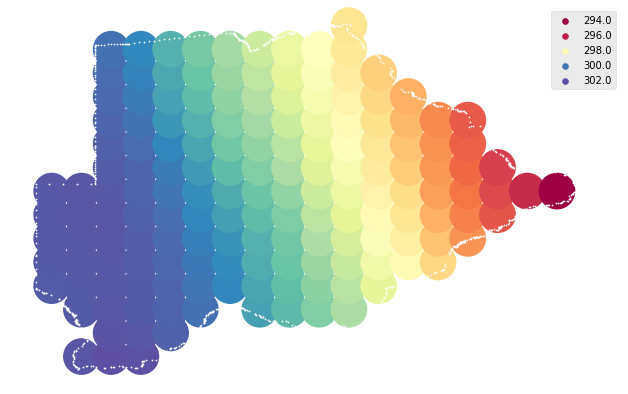

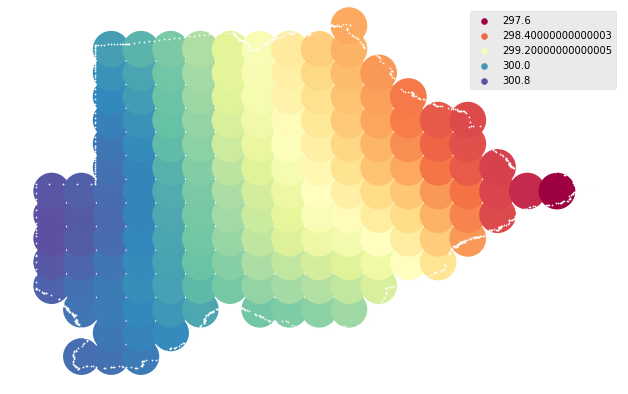

In [13]:
fig, scatter = plt.subplots(figsize = (11,7))
sns.scatterplot(bots_win[:, 1], bots_win[:, 0], hue = botswana[0, bots_dim, 500], s=1350, edgecolor="none", palette = 'Spectral')
sns.scatterplot(bots[:, 0], bots[:, 1] + 180, s =1)
plt.axis('off')
plt.legend()
plt.show()

fig, scatter = plt.subplots(figsize = (11,7))
sns.scatterplot(bots_win[:, 1], bots_win[:, 0], hue = botswana[1, bots_dim, 500], s=1350, edgecolor="none", palette = 'Spectral',vmin=290, vmax=310)
sns.scatterplot(bots[:, 0], bots[:, 1] + 180, s =1)
plt.axis('off')
plt.legend()
plt.show()

In [14]:
save_dir = os.path.expanduser('~/Downloads/' + kernel)

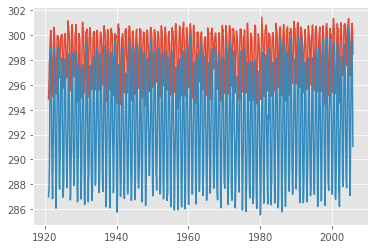

In [15]:
fig,ax = plt.subplots()
ax.plot(bots_t, botswana[1, 0, :])
ax.plot(bots_t, botswana[1, 470, :])

In [16]:
y = botswana

In [17]:
n = y.shape[0]

In [18]:
n

30

In [19]:
combos = list(itertools.combinations(np.arange(n), 2))

In [20]:
data = [np.concatenate((botswana[pair[0]].reshape(528, -1), botswana[pair[1]].reshape(528, -1)), axis = -1) if (pair[1] < 30) else np.zeros((528, 2040)) for pair in combos]

In [21]:
t = np.concatenate((bots_t, bots_t))
t = t - np.mean(t)

In [22]:
y =data

In [23]:
len(y)

435

In [24]:
t_y = np.array([np.concatenate((t[j:j+205], t[1020+j:1225 +j])) for i in range(len(y)) for j in range(0, 815, 163)])


In [25]:
bots_loc = bots_loc[np.arange(159, 173), :]

In [26]:
bots_loc = bots_loc[None, :, None, :]

In [27]:
bots_loc.shape

(1, 14, 1, 2)

In [28]:
bots_loc = np.repeat(bots_loc,  1, axis =0)

In [29]:
bots_loc = np.repeat(bots_loc,  410, axis =2)

NameError: name 'd_y' is not defined

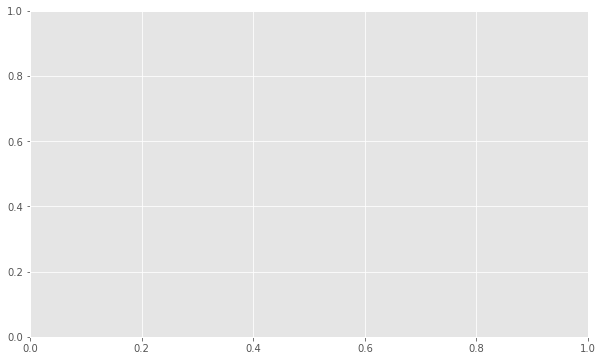

In [30]:
cmap = plt.get_cmap('Paired', 2)

fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(t_y[261, :205], d_y[261,1, :205])
ax.plot(t_y[261, 205:], d_y[261,1, 205:])
# ax.plot(t_y[3, :205], d_y[3,1, :205])
# ax.plot(t_y[3, 205:], d_y[3,1, 205:])
plt.show()

In [ ]:
np.arange(159, 173)

In [31]:
c=290
to_gather = helpers.gather_idx(c,  l=410, b=1)
to_gather_3d = np.concatenate([np.concatenate((to_gather, np.repeat(i, len(to_gather)).reshape(-1, 1)), axis = 1) for  i in np.arange(0, 14)])

temp = np.zeros((1, 14, 410))
temp[to_gather_3d[:, 0], to_gather_3d[:, 2], to_gather_3d[:, 1]] = 1

In [32]:
train_step, test_step, train_loss, test_loss, m_tr, m_te = grapher_bots.build_graph()

### Training

In [33]:
if __name__ == '__main__':
    step = 0
    # change to run 9 if you want to overfit
    EPOCHS = 575; batch_s  = 1; run = 1; tr_regime ='shuffle'
    l= [88, 64, 32]; heads = 1; e = 88; context = 290; c=290
    name_comp = 'run_' + str(run)
    logdir = save_dir + '/logs/' + name_comp
    writer = tf.summary.create_file_writer(logdir)
    folder = save_dir + '/ckpt/check_' + name_comp
    optimizer_c = tf.keras.optimizers.Adam(3e-4)
    helpers.mkdir(folder)
    decoder = exp2d_model_bots.Decoder(e, l[0], l[1], l[2], num_heads=heads)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=optimizer_c, net=decoder)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    else:
        print("Initializing from scratch.")
    with writer.as_default():
        for epoch in range(EPOCHS):
            start = time.time()
            for batch_n in range(100):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
                    idxs = np.random.choice(np.arange(1900), 1)                    
                    y_tr = np.concatenate([np.load('/Users/omernivron/Downloads/bots_data/y/{}_d_y.npy'.format(i))[None, :, :] for i in idxs], axis=0)[:, np.arange(159, 173), :]
                    x_tr = np.concatenate([np.load('/Users/omernivron/Downloads/bots_data/x/{}_x.npy'.format(i))[None, :, :, : ] for i in idxs], axis=0)
                    x_tr = np.repeat(x_tr[:, None, :, :], 14, axis =1).squeeze()
                    x_tr = np.concatenate((x_tr[None, :, :, :], bots_loc), axis=3)
                    pred, pred_log, weights, names, shapes, y_real, g = train_step(decoder, optimizer_c, train_loss, m_tr, x_tr, y_tr, d = True, to_gather=temp)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context, heads)
                if batch_n % 10 == 0:
                    m_te.reset_states(); test_loss.reset_states()
#                     if d:
#                         idxs_te = np.random.choice(np.arange(1900, 2175), 32)
#                         permute_idx_te = np.arange(410)
#                         to_gather_te = helpers.gather_idx(c, l=410, b=32)
#                         temp_te = np.zeros((32, 410))
#                         temp_te[to_gather_te[:, 0], to_gather_te[:, 1]] = 1
#                         y_te = aa[idxs_te, :][:, permute_idx_te] 
#                         x_te = x[idxs_te, :, :]
#                         pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = x_te, y_te = y_te, to_gather=temp_te, d=True)
#                         fig,ax = plt.subplots()
                        
#                         ax.plot(t_yy[idxs_te[1], 70:] , y_te[1][70:], c='blue')
#                         ax.plot(t_yy[idxs_te[1], :50], y_te[1][:50], c='red')
#                         ax.plot(t_yy[idxs_te[1], 50:70], y_te[1][50:70], c='red')
#                         ax.plot(t_yy[idxs_te[1], 70:], pred_te[1, 69:], c='goldenrod') 
#                         plt.show()
                        
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
                    manager.save()
                step += 1
                ckpt.step.assign_add(1)
            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

New folder /Users/omernivron/Downloads/botswana/ckpt/check_run_1
Initializing from scratch.
Tensor("decoder/Squeeze_1:0", shape=(14, 409, 2), dtype=float64)
Tensor("decoder/Squeeze_1:0", shape=(14, 409, 2), dtype=float64)
Epoch 0 batch 0 train Loss 336.0471 test Loss 0.0000 with training MSE metric 6.9927 and testing MSE metric 0.0000
learning rate is 0.0003000000142492354
Epoch 0 batch 10 train Loss 5.9734 test Loss 0.0000 with training MSE metric 6.7044 and testing MSE metric 0.0000
learning rate is 0.0003000000142492354
Epoch 0 batch 20 train Loss 1.2225 test Loss 0.0000 with training MSE metric 6.0214 and testing MSE metric 0.0000
learning rate is 0.0003000000142492354
Epoch 0 batch 30 train Loss 1.0812 test Loss 0.0000 with training MSE metric 6.7190 and testing MSE metric 0.0000
learning rate is 0.0003000000142492354
Epoch 0 batch 40 train Loss 1.0025 test Loss 0.0000 with training MSE metric 6.7393 and testing MSE metric 0.0000
learning rate is 0.0003000000142492354
Epoch 0 batc

KeyboardInterrupt: 

In [51]:
bots_loc.shape

(1, 528, 410, 2)

In [42]:
idxs = np.random.choice(np.arange(1900), 1)                    

In [43]:
x_tr = np.concatenate([np.load('/Users/omernivron/Downloads/bots_data/x/{}_x.npy'.format(i))[None, :, :, : ] for i in idxs], axis=0)

In [44]:
x_tr.shape

(1, 410, 1, 86)

In [45]:
y_tr = np.concatenate([np.load('/Users/omernivron/Downloads/bots_data/y/{}_d_y.npy'.format(i))[None, :, :] for i in idxs], axis=0)

In [48]:
y_tr[:, np.arange(159, 173), :]

(1, 14, 410)

### Embeddings in tensorboard

In [ ]:
helpers.tensorboard_embeddings(decoder, layer_num = 0, meta_data = np.concatenate(([0, 1], np.unique(b_data[2]))))

In [ ]:
y_s = aa[idd, :70] 

In [ ]:
aa[1, :].shape

In [ ]:
idd[0]

In [23]:
y_tr.shape

(1, 528, 410)

In [ ]:
aa.max()

### Inference

In [ ]:
idd = np.random.choice(np.arange(4000, 4877), 1)[0]
fig,ax = plt.subplots()
for j in range(100):
    y_s = aa[idd, :70] 
    y_s = y_s[:-1][None, :]
    for i in range(29):
        x_s = x[idd, :(70 + i), :][None, :, :]
        _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=True)
        y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
    ax.plot(t_yy[idd, :50], aa[idd][:50], c='red')
    ax.plot(t_yy[idd, 50:70], aa[idd][50:70], c='red')
    
    ax.plot(t_yy[idd, 70:-1], (y_s.numpy()[:, 69:].reshape(-1)), c='lightblue')
y_s = aa[idd, :70] 
y_s = y_s[:-1][None, :]
for i in range(29):
    x_s = x[idd, :(70 + i), :][None, :, :]
    _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=False)
    y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
ax.plot(t_yy[idd, :50], aa[idd][:50], c='red')
ax.plot(t_yy[idd, 50:70], aa[idd][50:70], c='red')
ax.plot(t_yy[idd, 70:-1], (y_s.numpy()[:, 69:].reshape(-1)), c='goldenrod')
ax.plot(t_yy[idd, 70:], aa[idd][70:], c='blue')

In [ ]:
def evaluate(model, x, y, sample=True, d=False):

    combined_mask_x = masks.create_masks(x[:, :, 0])
    pred = model(x, y, False, combined_mask_x[:, :-1, :-1])
    if sample:
        sample_y = np.random.normal(pred[-1, 0], np.exp(pred[-1, 1]))
    else:
        sample_y = pred[-1, 0]

    return pred[:, 0], pred[:, 1], sample_y

In [ ]:
from helpers import masks

In [35]:
a = tf.constant([[[[1, 2 ], [2, 2]], [[1, 0], [0,1]]], [[[1, 2 ], [2, 2]], [[1, 0], [0,1]]], [[[1, 2 ], [2, 2]], [[1, 0], [0,1]]]])

In [36]:
b=  tf.constant([[[[0, 0 ], [1, 0]], [[1, 0], [0,1]]], [[[1, 1 ], [2, 2]], [[1, 1], [0,0]]], [[[0, 0 ], [1, 0]], [[1, 0], [0,1]]]])

In [39]:
a

<tf.Tensor: shape=(3, 2, 2, 2), dtype=int32, numpy=
array([[[[1, 2],
         [2, 2]],

        [[1, 0],
         [0, 1]]],


       [[[1, 2],
         [2, 2]],

        [[1, 0],
         [0, 1]]],


       [[[1, 2],
         [2, 2]],

        [[1, 0],
         [0, 1]]]], dtype=int32)>

In [37]:
    c = tf.tensordot(tf.squeeze(a), tf.transpose(tf.squeeze(b), perm=[0, 1, 3, 2]), axes=[[3], [2]])

In [38]:
c

<tf.Tensor: shape=(3, 2, 2, 3, 2, 2), dtype=int32, numpy=
array([[[[[[0, 1],
           [1, 2]],

          [[3, 6],
           [3, 0]],

          [[0, 1],
           [1, 2]]],


         [[[0, 2],
           [2, 2]],

          [[4, 8],
           [4, 0]],

          [[0, 2],
           [2, 2]]]],



        [[[[0, 1],
           [1, 0]],

          [[1, 2],
           [1, 0]],

          [[0, 1],
           [1, 0]]],


         [[[0, 0],
           [0, 1]],

          [[1, 2],
           [1, 0]],

          [[0, 0],
           [0, 1]]]]],




       [[[[[0, 1],
           [1, 2]],

          [[3, 6],
           [3, 0]],

          [[0, 1],
           [1, 2]]],


         [[[0, 2],
           [2, 2]],

          [[4, 8],
           [4, 0]],

          [[0, 2],
           [2, 2]]]],



        [[[[0, 1],
           [1, 0]],

          [[1, 2],
           [1, 0]],

          [[0, 1],
           [1, 0]]],


         [[[0, 0],
           [0, 1]],

          [[1, 2],
           [1, 0]],

